# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [48]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [49]:
print(iris.data)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [50]:
iris.data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [51]:
def alpha_func(D, idx):
   sepal_width = D['Sepal.Width'].iloc[idx]  
   sepal_length = D['Sepal.Length'].iloc[idx]
   cov_ = np.cov([sepal_width, sepal_length], rowvar=True)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [52]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [53]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158227

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Sepal.length will give a point estimate of the average length of iris petals. Performing bootstrapping will provide variability in the sample mean, enhancing the reliability of the analysis.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [54]:
bootstrap_values = []

def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [55]:
alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
alpha_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

In [ ]:
# Your code here

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [59]:
original_mean_sepal_length = df['Sepal.Length'].mean()

print("Original mean value of sepal.length:", original_mean_sepal_length)

Original mean value of sepal.length: 5.843333333333334


In [71]:
boot_se_samples = np.random.normal(loc=original_mean_sepal_length, scale=1.0, size=1000)

t_range = np.ptp(boot_se_samples)
boot_std = np.std(boot_se_samples)
boot_mean = np.mean(boot_se_samples)

print("t_range:", "{:.15f}".format(np.ptp(boot_se_samples)))
print("standard deviation:", "{:.15f}".format(np.std(boot_se_samples)))
print("mean:", "{:.15f}".format(np.mean(boot_se_samples)))

t_range: 7.144836142929755
standard deviation: 1.013612806367282
mean: 5.886254666859613


In [72]:
original_mean = original_mean_sepal_length
bootstrapped_mean = boot_mean

mean_difference = bootstrapped_mean - original_mean

print("Difference between bootstrapped mean and original mean:", mean_difference)

Difference between bootstrapped mean and original mean: 0.04292133352627925


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [73]:
lower_bound = np.percentile(boot_se_samples, 2.5)
upper_bound = np.percentile(boot_se_samples, 97.5)

print("95% Confidence Interval for the mean value of iris petal length:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

95% Confidence Interval for the mean value of iris petal length:
Lower bound: 3.9121487601361093
Upper bound: 7.847161781362737


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

The histogram shows the distribution of the bootstrapped samples of standard errors of iris petal length.

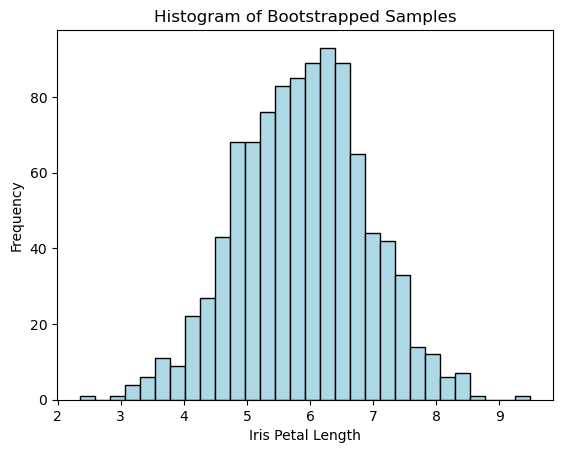

In [74]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
plt.hist(boot_se_samples, bins=30, color='lightblue', edgecolor='black')

# Add a title
plt.title('Histogram of Bootstrapped Samples')

# Add a label to the x-axis
plt.xlabel('Iris Petal Length')

# Add a label to the y-axis
plt.ylabel('Frequency')

# Show the plot
plt.show()

(x) Given your bootstrapped analysis, what do you recommend to shipping company?

Mean Value

The bootstrapped mean is slightly higher than the original mean, which suggests that the average petal length is slightly longer. 

Original mean = 5.843
Bootstrapped mean = 5.886
Difference = 0.043

Confidence Interval
Indicates that the length of the petals falls between 3.912 – 7.85. 

Histogram 
Shows the distribution of the petal lengths and outliers. 

My advice to the company would be to allocate enough space to accommodate petals between 3.912 – 7.85 in length. However, the majority of the space should be dedicated to the range of 4.75 - 6.75. 


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
